## Take over
Given 

equ1 :
$C = y^2 + (\frac{x}{2}^2)$

and 

equ2 : 
$C = \frac{1}{1 + y^2} +  \frac{1}{1 + x^2}$


## Drawing equations 

### range definition and matplotlib imports

In [3]:

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import xlim, ylim
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib.ticker import LinearLocator


# Range definition
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

In [4]:
#plot fig definition
def plot_fig(X, Y, Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)
    cset = ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.coolwarm)
    plt.show()

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

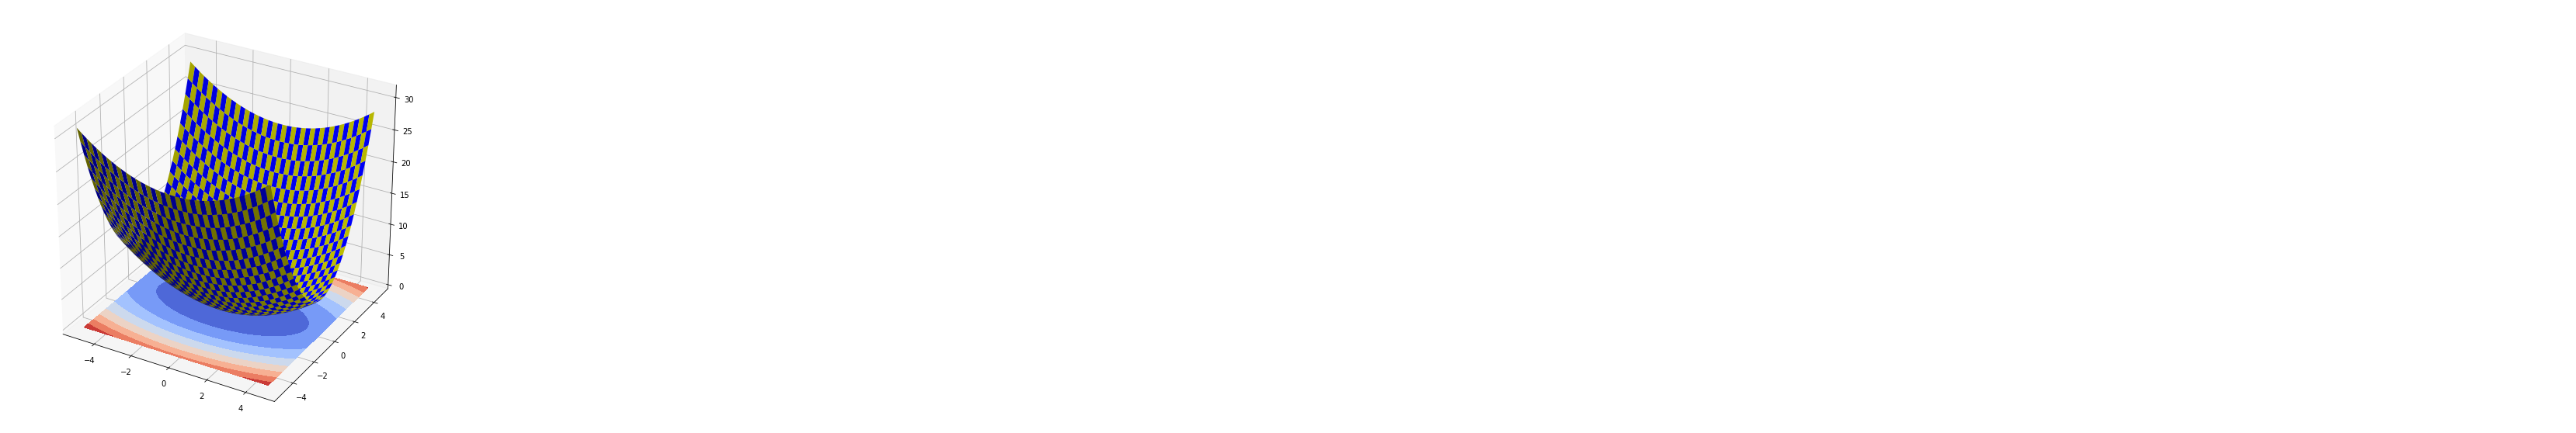

In [5]:
Z = (X/2)**2 + Y**2
plot_fig(X, Y, Z)

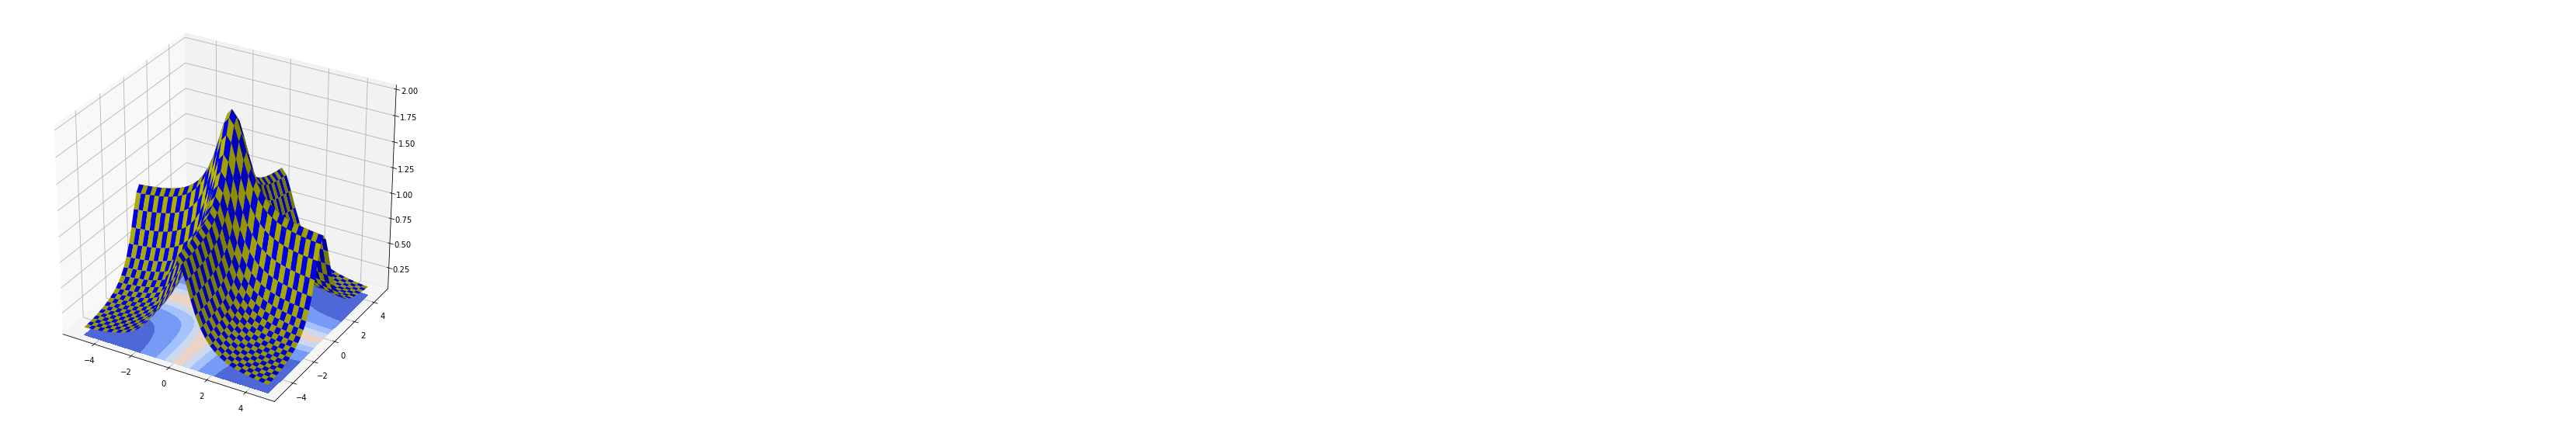

In [6]:
Z = (1/(X**2 + 1)) + (1/(Y**2 + 1))
plot_fig(X, Y, Z)

so we notice that the zones with the same marks, represent the same level, same (Z), so if $Z = C_{ste}$, if we want to redraw those zones, we fix $Z$ and rewrite $y(x)$, after somme calculations, equations become :

equation1:

$y = +- \sqrt{C - \frac{x}{2}^2}$

equation2:

$y = +- \sqrt{\frac{1 + x^2}{(1 + x^2)C} - 1}$

In [7]:
# y = +-sqrt(( (1 + x**2)/((1 + x**2) * C)) - 1)
def f2(x, C = 1):
    num = 1 + x**2
    den = (1 + x**2) * C - 1
    
    if (num/den - 1) >= 0 :
        return np.sqrt(num/den - 1)
    else:
        return np.nan
# y = +- sqrt(C - (x/2)**2)
def f1(x, C = 1):
    val = C - ((x**2)/2)
    if (val >= 0) :
        return np.sqrt(val)
    else:
        return np.nan

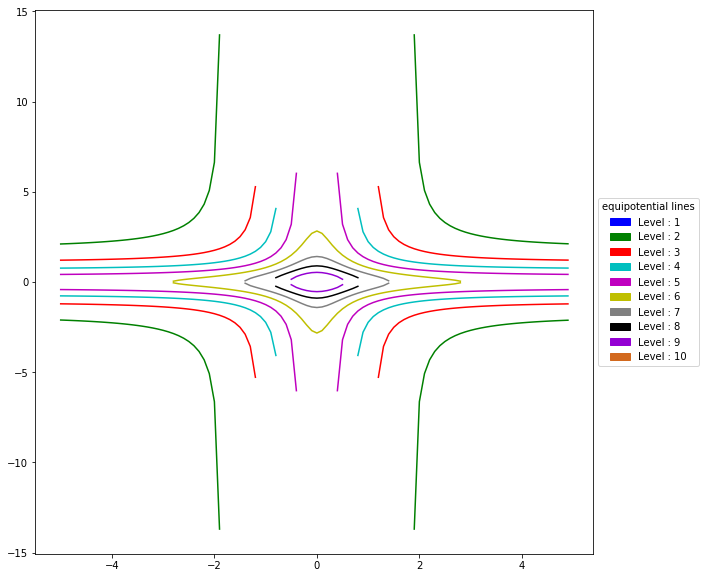

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x = np.arange(-5, 5, 0.1) 
Cs = np.linspace(0,2,10)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'grey', 'k','darkviolet','chocolate']
handles = []
for i,C in enumerate(Cs):
    patch = mpatches.Patch(color = colors[i], label="Level : " + str(i + 1))
    handles.append(patch)
    plt.plot(x ,[f2(el, C) for el in x ],colors[i])
    plt.plot(x ,[-f2(el, C) for el in x ], colors[i])

plt.legend(handles=handles, title="equipotential lines",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


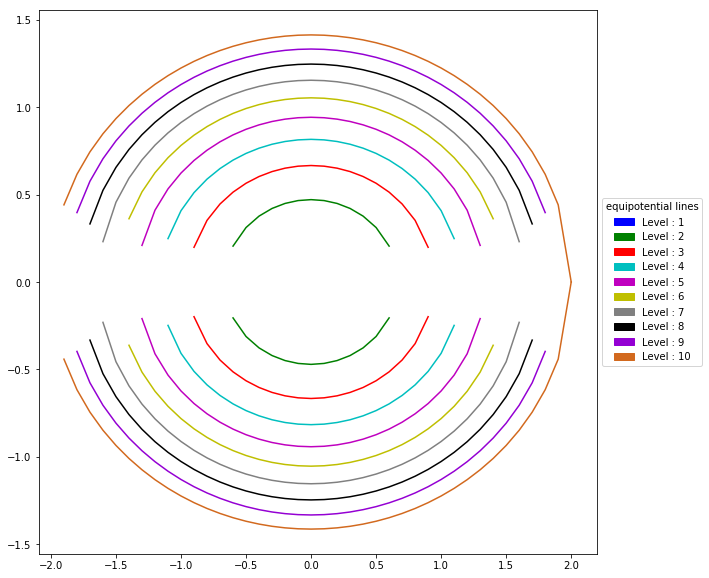

In [9]:
handles = []
Cs = np.linspace(0,2,10)
for i,C in enumerate(Cs):
    patch = mpatches.Patch(color = colors[i], label="Level : " + str(i + 1))
    handles.append(patch)
    plt.plot(x ,[f1(el, C) for el in x ],colors[i])
    plt.plot(x ,[-f1(el, C) for el in x ],colors[i])
plt.legend(handles=handles, title="equipotential lines",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

### Gradient calculations

As defined previously gradient is  () here we have either the temperature $T(x,y)$ that depend on $x,y$ coordinate space
or the likelihood of traveling $Z(x,y)$ that depends on $x,y$ time and money 

Here by computing the gradient according to the definition for both $Z(x, y)$ and $T(x, y)$
we endup with :

$\overrightarrow{gradT(x, y)} = \begin{pmatrix} 
\frac{\partial T(x, y)}{\partial x}  \\
\frac{\partial T(x, y)}{\partial y}  
\end{pmatrix}=\begin{pmatrix} 
x  \\
2y  
\end{pmatrix}
$

and for Z 

$\overrightarrow{gradZ(x, y)} = \begin{pmatrix} 
\frac{\partial Z(x, y)}{\partial x}  \\
\frac{\partial Z(x, y)}{\partial y}  
\end{pmatrix}=\begin{pmatrix} 
\frac{-2x}{(1 + x^2)^2}  \\
\frac{-2y}{(1 + y^2)^2}  
\end{pmatrix}
$

In [10]:
def gradT(x, y):
    return np.array([x , 2 * y]).reshape(2,1)
    
def gradZ(x, y):
    return np.array([(-2 * x )/((1 +x**2)**2), (-2 * y )/((1 +y**2)**2)]).reshape(2,1)


### Gradient descent sequence

as gradf is the vector that shows the direction where f is increasing locally, for $\alpha \in \Bbr{R+}$ small enought to consider that $f(x + \alpha grad(f))$ is still in the same region as  $f(x)$ we will have the following inequations valid

$f(x + \alpha grad(f)) >= f(x)$ 

and

$f(x - \alpha grad(f)) <= f(x)$

As we want to increase $Z(x,y)$ we will move in space following this sequence $x_{n+1} = x_n + \alpha_Z gradZ$ until we are at a maximum => $gradZ = 0$

and 

As we want to decrease $T(x, y)$ we will move in space following this sequence $x_{n+1} = x_n - \alpha_T gradT$ 

### Drawing Gradient descent 

#### Factorizing plot function and gradient descent

In [11]:
def plot_func(f, X, Cs):
    for C in Cs:
        plt.plot(X ,[f(el, C) for el in X ],"black")
        plt.plot(X ,[-f(el, C) for el in X ],"black")

def gradient_desc(x0, y0, gradf, alpha):
    X0 = np.array([x0, y0]).reshape(2,1)
    Xs = []
    i  = 0
    while (np.linalg.norm(gradf(X0[0], X0[1])) > 1e-3) and (i < 2000):
        i = i + 1
        Xs.append(X0)
        X1 = X0 + alpha * gradf(X0[0], X0[1])
        X0 = X1
        #print(i)
    if (i >= 2000):
        print("The method did'nt converge with the rate :", alpha)
    Xs = np.array(Xs)
    Xs = Xs.reshape(Xs.shape[0], Xs.shape[1])
    return Xs
    
    

the method converged in 34 steps


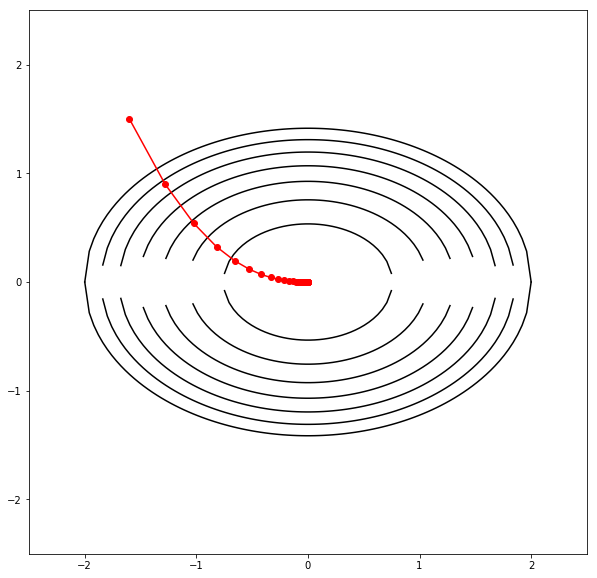

In [12]:
#rate definition
#plt.rcParams['figure.figsize'] = 15,5
alpha_T = 0.2

# levels of energy
Cs = np.linspace(0,2,8)

#Random coordinate space within the considired range
x0 = -1.6
y0 = 1.5

X = np.linspace(-2,2,100)

Xs = gradient_desc(x0, y0, gradT, -alpha_T)

ylim(-2.5,2.5)
xlim(-2.5,2.5)
#plot the function f1 according to the different levels of energy
plot_func(f1, X,Cs)
plt.plot(Xs[:,0],Xs[:,1],"ro-")
print("the method converged in " + str(len(Xs)) + " steps")

    
#construct the sequence 
plt.show()


the method converged in 19 steps


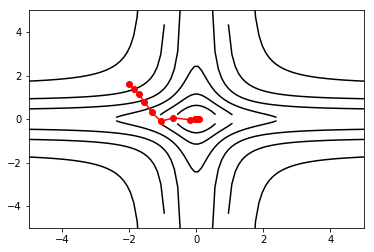

In [11]:
#rate definition
#plt.rcParams['figure.figsize'] = 15,5
alpha_Z = 0.8

# levels of energy
Cs = np.linspace(0,2,8)

#Random coordinate space within the considired range
x0 = -2
y0 = 1.6



Xs = gradient_desc(x0, y0, gradZ, alpha_Z)
X = np.linspace(-5,5,100)

ylim(-5,5)
xlim(-5,5)
#plot the function f1 according to the different levels of energy
plot_func(f2, X,Cs)
plt.plot(Xs[:,0],Xs[:,1],"ro-")
print("the method converged in " + str(len(Xs)) + " steps")
    
#construct the sequence 
plt.show()


## Discussing the rate alpha

### Importance of the rate alpha

In the previous examples, alpha have been choosen carefully as we can converge without problems.

In the gradient descent, since you want to converge to the extremum and you want to do it quickly, alpha determines how big are your steps toward the solution

The gradient tells you how the function evolves locally, if you choose a small alpha, you will converge slowly (small steps), and if you choose a big alpha (big steps), you risk to not anymore being considered locally, so the direction given by the gradient w'ont anymore be relevant(w'ont describe how really the function evolve by this location), and you might never converge or you will go over the solution many times before finding it.

To illustrate what we say, we will take as example the Temperature.Water situation with 3 differents rates and see what happens

The method did'nt converge with the rate : -1


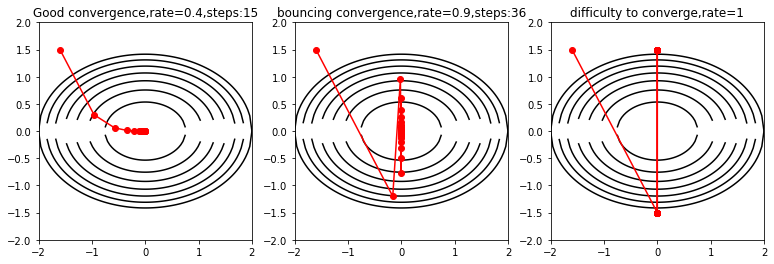

In [12]:
from matplotlib.pyplot import ylim, xlim
#rate definition
plt.rcParams['figure.figsize'] = 13,4

# levels of energy
Cs = np.linspace(0,2,8)

#Random coordinate space within the considired range
x0 = -1.6
y0 = 1.5
X = np.linspace(-2,2,100)

#setting alpha_T to 0.2
alpha_T = 0.4
ax = plt.subplot(131)

Xs = gradient_desc(x0, y0, gradT, -alpha_T)
plot_func(f1,X, Cs)
ylim(-2,2)
xlim(-2,2)
plt.plot(Xs[:,0],Xs[:,1],"ro-")
plt.title("Good convergence,rate=0.4,steps:"+str(len(Xs)))

#setting alpha_T to 0.8
alpha_T = 0.9
ax = plt.subplot(132)
Xs = gradient_desc(x0, y0, gradT, -alpha_T)
ylim(-2,2)
xlim(-2,2)
plot_func(f1,X, Cs)
plt.plot(Xs[:,0],Xs[:,1],"ro-")
plt.title("bouncing convergence,rate=0.9,steps:"+str(len(Xs)))

#setting alpha_T to 3
alpha_T = 1
ax = plt.subplot(133)
Xs = gradient_desc(x0, y0, gradT, -alpha_T)
ylim(-2,2)
xlim(-2,2)
plot_func(f1,X, Cs)
plt.plot(Xs[:,0],Xs[:,1],"ro-")
plt.title("difficulty to converge,rate=1")



    
#construct the sequence 
plt.show()


### Is there anyway to choose a good alpha to be sure to converge, and to do it more rapidly?

Yes there is, we will see here 2 methods, the steepest descent, and the conjugate gradient with the temperature example.

### Steepest descent gradient 

The first one consist of moving from one equipotential (level of energy) to a better equipotential (level of energy) where the gradient of the second is perpendicular to the first one.

##### Yes but why ?

When we compute gradient at a point $X_0$, it gives us a direction, the more we go "locally" in this direction, the more the function increase, until being in at a point $X_1$ where the function does'nt increase anymore in this point if we compute the gradient again, it will be perpendicular to the previous one !.

### Conjugate gradient 

The conjugate gradient, is the best method, actually you are sure to find the solution at $n$ iterations maximum $/n$ is the rank matrix of $A$.

This method could be undestood as following, where ever you are in the space at the position $X_0$ and you are trying to reach the position $X^*$ "the solution", what separate you from $X^*$ is an error $e_0 = X^* - X_0$ that has n component, if you can guess what is each one of it's component at each iteration, you could find $X^*$ starting from $X_0$ in n steps maximum.

That is what the conjugate gradient method is about

In [13]:
def get_alpha(A,Xn):
    alpha_n = (((A@Xn).T)@(A@Xn)) /(((A@Xn).T)@(A@A@Xn))
    return np.asscalar(alpha_n)

def gradient_desc2(x0, y0, gradf, A, tol=1e-3):
    X0 = np.array([x0, y0]).reshape(2,1)
    Xs = []
    i  = 0
    while (np.linalg.norm(gradf(X0[0], X0[1])) > tol) and (i < 2000):
        i = i + 1
        alpha = get_alpha(A, X0)
        Xs.append(X0)
        X1 = X0 - alpha * gradf(X0[0], X0[1])
        X0 = X1
        #print(i)
    Xs.append(X0)
    Xs = np.array(Xs)
    Xs = Xs.reshape(Xs.shape[0], Xs.shape[1])
    if (i >= 2000):
        print("The method did'nt converge with the rate :", alpha)
    else:
        print("the method converged in " + str(len(Xs) - 1) + " steps")
    return Xs
    


The method did'nt converge with the rate : 1.0
the method converged in 1 steps


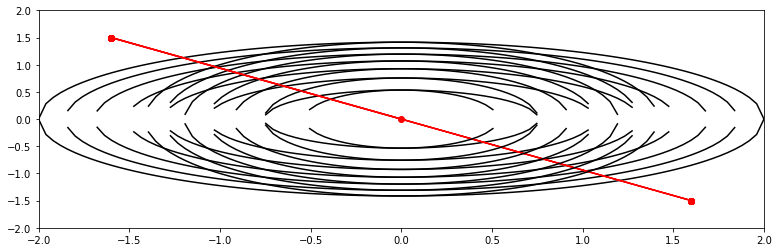

In [14]:
# y = +- sqrt(C - (x/2)**2)
def circle(x, C = 1):
    val = C - ((x**2))
    if (val >= 0) :
        return np.sqrt(val)
    else:
        return np.nan
def gradC(x, y):
    return np.array([2 * x, 2 * y]).reshape(2,1)
Cs = np.linspace(0,2,8)

#Random coordinate space within the considired range
x0 = -1.6
y0 = 1.5


A = np.array([[1, 0],[0,1]]).reshape(2,2)
Xs = gradient_desc2(x0, y0, gradC, A)

#plot the function f1 according to the different levels of energy
xlim(-2,2)
ylim(-2,2)
X = np.linspace(-2,2,100)

plot_func(f1,X, Cs)
plt.plot(Xs[:,0],Xs[:,1],"ro-")

    
#construct the sequence 
#rate definition
#plt.rcParams['figure.figsize'] = 15,5

plt.rcParams['figure.figsize'] = 5,5
# levels of energy
Cs = np.linspace(0,2,8)

#Random coordinate space within the considired range
x0 = -1.6
y0 = 1.5


A = np.array([[2, 0],[0,2]]).reshape(2,2)
Xs = gradient_desc2(x0, y0, gradC, A)

#plot the function f1 according to the different levels of energy
xlim(-2,2)
ylim(-2,2)
X = np.linspace(-2,2,100)

plot_func(circle,X, Cs)
plt.plot(Xs[:,0],Xs[:,1],"ro-")

    
#construct the sequence 
plt.show()

### Conjugate gradient 

The algorithm of conjugate gradient (CG) is an optimization of the Conjugate direction algorithm (CD), CG and CD are really simple, but to hunderstand what happens, and why the methods work, it's quit thought, and i have made a considerable effort to make it clear and hunderstandable, so keep focus it's a really nice and elegant exercice.

If you are not interested by hunderstanding the method, you can skip the explanation, and go directly to "conjugate algorithm gradient", but if you want to hunderstand, we are going to proceed as follow:

* Preliminaries : see what happens when we do  $\frac{1}{2} X^TAX$
* CD Idea : Orthogonal search for error components 
* A-Orthonality : The impossibility to operate the search in normal space, and the necissity to do A orthogonal search
* CD Algorithm
* CG Algorithm





#### Premilinaries

The equation of a circle in 2d dimension centred in (0,0) is known as $x^2 + y^2 = R^2$ we can rewrite it in a matrix format as $X^TI_2X  = \frac{1}{2}X^T2I_2X = R^2$.

D'ont you remenber anything ?! oh yes the $\frac{1}{2} X^TAX = C = R^2$ ellipse equation in matrix format.



$\frac{1}{2} X^TAX = R^2 = \frac{1}{2} \begin{pmatrix} 
x & y 
\end{pmatrix}^T \begin{pmatrix} 
1 & 0\\
0 & 2
\end{pmatrix}\begin{pmatrix} 
x \\
y 
\end{pmatrix}$ can b rwritten as :

$
\begin{pmatrix} 
x & y 
\end{pmatrix}^T \begin{pmatrix} 
\frac{1}{\sqrt{2}}  & 0\\
0 & 1
\end{pmatrix}\begin{pmatrix} 
\frac{1}{\sqrt{2}}  & 0\\
0 & 1
\end{pmatrix}\begin{pmatrix} 
x \\
y 
\end{pmatrix} = (X^TD)I_2(DX) = R^2 $

It strangly reminds the equation of circle drawing $X^TI_2X = R^2$ but with a modification in the input where $X \rightarrow DX$

What happens actually, it's by multiplying $D$ by $X$ we are operationg a linear transformation to the space, a stretch to the space and the equation $(X^TD)I_2(DX) = R^2$ is the equation of a circle 2d centred in (0,0) but in the stretched space, in the normal (not stretched) space it's an ellipse.

To actually confirm what we say, we are going to draw $\frac{1}{2} X^TAX = R^2$ in the normal space and the stretched space and see how it look likes in both.

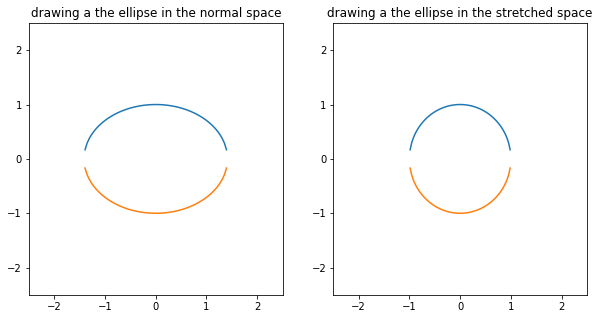

In [15]:
plt.rcParams['figure.figsize'] = 10,5

X = np.linspace(-2,2,100)
Y = np.array([f1(x, C = 1) for x in X if (f1(x, C = 1) != np.nan)] )

alpha_T = 0.9
ax = plt.subplot(121)
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
plt.plot(X, Y)
plt.plot(X, -Y)
plt.title("drawing a the ellipse in the normal space")

ax = plt.subplot(122)
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
# Since DX, keep the second component as it is and multiply the first by (1/sqrt(2))
plt.plot(X/np.sqrt(2), Y)
plt.plot(X/np.sqrt(2), -Y)
plt.title("drawing a the ellipse in the stretched space")

    
#construct the sequence 
plt.show()


### Comments : 

It is quit obvious that by drawing this ellipse in the stretched space, we are drawing actually a cricle.

This part is important to visualize what happens, and to hunderstand what will follows

### Conjugate directions idea :

The steepest descent method has a weakness, it  is that we usually go over the same direction several times, before getting to the minimizer/maximizer $X^*$ what if we could do that we go in each directions just one time and no more, we would be sure to converge at n iteration maximum.

The error $e_0 = X^* - X_0$ could be expressed in an ortogonal base formed by ${d_1,d_2,....,d_n}$,  as $e_0 = \sum^{i = N}_{i = 1} \alpha_i d_i$ 

If at each ith step we could move in the space by $ - \alpha_i d_i$, that means that at each iteration we would eliminate a component from $e_0$, the first step would 
be $e_1 = e_0 - \alpha_0 d_0 =  X^* - (X_0 + \alpha_0 d_0) = X^* - (X_1)$

That would imply that $d_i^Te_{i+1} = 0 
\iff d_i^T(e_{i} - \alpha_i d_i) = 0
\iff \alpha_i = \frac{d_i^Te_{i}}{d_i^Td_i}$

We would have managed to construct the base of orthogonal vectors $d_i$ by choosing $d_0 = AX_0 - 0 = r_0$
and then do Gram shmitz orthogonalisation to have the others $d_i/i!= 0$ but the problem here is the term $e_i$ in $\alpha_i$ we d'ont have it, and if we did, there is no need to go further since $ei =  X^* - X_i$ we would read the solution directly.

### A-Orthogonal search
#### Idea
So the clever idea here is, since we can't operate the orthogonal search in the normal space because of the unknown term ei, let operate an A-orthogonal search, it means that we will do an orthogonal search as if we were in the stretched space. by using a set of vectors that are A-orthogonal between themselves (orthogonal in the stretched space),

$<p_i|Ap_j> = 0 = <p_i^TA|p_j>$


different base $B_p$ = {p_1,..,p_n}, where $B_p$ is A-orthogonal base $quelque soit i,j \in {1,...,n} / i != j, <p_i|Ap_j> = 0 = <p_i^TA|p_j>$


By doing that, the the trouble maker $ei$ is replaced in $\alpha_i$ by anoter term that we have acess to $Ae_i$

#### let "proof" what we say in the General form : 

* the general form of the quadratic : $f(X) =  \frac{1}{2}X^TAX - bX + C \rightarrow gradf(X) = \nabla f(X) = AX - b$
* $X^*$ is the minimizer of f, so $\nabla f(X^*) = 0 \rightarrow AX^* = b$
* We define the residual as $r_i = AX_i - b = \nabla f(X_i)$
* We define $ei = X^* - X_i$
* We consider $B_p$ an A-orthogonal base formed by A orthogonal vectors $p_i$ for $i, j \in {{1,..,n}} for i != j, pi^T A p_j = 0$
* $X_{i + 1} = X_i + \alpha_i p_i$

We have 2 problems here, determine the directions $p_i$ for $i in {1,...,n}$ and $\alpha_i$ the exact coefficient that reduce the error at the maximum within the direction $p_i$

#### Determination of $\alpha_i$

* Since $\alpha$ is unknown $X_{i+1}$ can be considered as a function of $\alpha$, since $X_{i + 1}(\alpha) = X_i + \alpha pi$

* Since $X_{i+1}$ is a function, $f(X_{i+1})$ is the compose of 2 functions and can be rewritten as $foX_{i + 1}(\alpha)$ 

* I know that mathematicians might beat me with a bat for i am going to say, but what ever :
  * We know that the derivative of composed functions  $(fog)^{'}(x) = f^{'}og(x) * g^{'}(x)$
  * We also know that the gradient is the generalization of the derivative
  * so  $\frac{dfoX_{i+1}(\alpha)}{d\alpha} = 0 \iff (\nabla f)oX_{i + 1}(\alpha) * \frac{dfoX_{i+1}(\alpha)}{d\alpha} = 0 
 \iff (AX_{i+1} - b)^T (X_i + \alpha p_i)^{'} =0\\
 \iff (A(X_{i+1} - X^*))^T p_i = 0\\
 \iff Ae_{i+1}^Tpi = 0\\
 \iff A(e_{i} + \alpha_i p_i)^Tp_i = 0\\
 \iff \alpha_i = \frac{-Ae_i}{p_i^Tp_i}\\
 \iff \alpha_i = \frac{-A(X_{i} - X^*)}{p_i^Tp_i}\\
 \iff \alpha_i = \frac{-(AX_{i} - b)}{p_i^Tp_i}\\
 \iff \alpha_i = \frac{-r_i}{p_i^Tp_i}$ 
 
 We d'ont have anymore the trable maker $e_i$ in the expression of $\alpha_i =  \frac{-r_i}{p_i^Tp_i}$ and now, if we have $p_i,\; \alpha_i$ can be easlly computed since we know how to compute $r_i$
 
 








Given $X_i$ and $p_i$ let determinate the best $\alpha$ that will minimize the temprature $T o X_{i + 1}(\alpha)$ at the point $X_{i+1}$.

We determine that by solving $\frac{dToX_{i+1}(\alpha)}{d\alpha} = \nabla T(X_{i+1})^T  \frac{dX_{i+1}}{d\alpha} \iff gradT(X_{i+1})^T p_i
\iff AX_{i+1}p_i
$



In [12]:
# y = +- sqrt(C - (x/2)**2)
def ellipse(x, C = 1):
    val = C - ((x**2)/2)
    if (val >= 0) :
        return np.sqrt(val)
    else:
        return np.nan


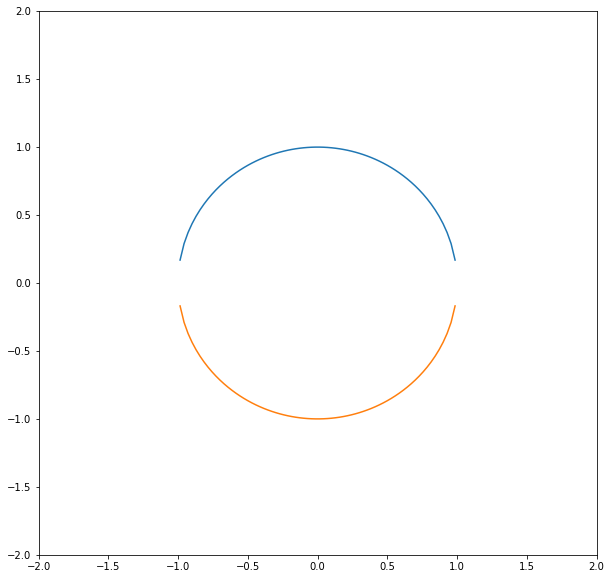

In [13]:
X = np.linspace(-2,2,100)
Y = np.array([ellipse(x) for x in X if (ellipse(x) != np.nan)])
ylim(-2,2)
xlim(-2,2)
plt.plot(X/np.sqrt(2),Y)
plt.plot(X/np.sqrt(2),-Y)

In [14]:
#rate definition
#plt.rcParams['figure.figsize'] = 15,5

# levels of energy
Cs = np.linspace(0,2,8)

#Random coordinate space within the considired range
x0 = -1.6
y0 = 1.5


A = np.array([[2, 0],[0,2]]).reshape(2,2)

#plot the function f1 according to the different levels of energy
plot_func(f3, Cs)
xlim(-2,2)
ylim(-2,2)
plt.plot(Xs[:,0],Xs[:,1],"ro-")

#construct the sequence 
plt.show()

NameError: name 'plot_func' is not defined

In [ ]:
print(plt.rcParams.get('figure.figsize'))
plt.rcParams['figure.figsize'] = 5,5